In [2]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'torch'

In [2]:
# Loading the kaggle Keepler's dataset
train = pd.read_csv('data/exoTrain.csv')
test = pd.read_csv('data/exoTest.csv')

# dimensions of train and test datasets
print(train.shape) # 5087, 3198
print(test.shape) # 570, 3198

train.head()

(5087, 3198)
(570, 3198)


,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [3]:
# diving into x(features) and y(label) set
# As label are labelled 2 and 1, changing them to 1 and 0


xtrain = np.array(train.drop(['LABEL'],axis=1))
ytrain = np.array(train['LABEL'])[:,None] - 1 # lable be in 0 or 1


xtest = np.array(test.drop(['LABEL'],axis=1)) # lable be in 0 or 1
ytest = np.array(test['LABEL'])[:,None] - 1

In [4]:
# negative obeservation
neg_sample = xtrain[np.squeeze(ytrain == 0)]

# positive observation
pos_sample = xtrain[np.squeeze(ytrain == 1)]


print(f"pos:{len(pos_sample)}")
print(f"neg:{len(neg_sample)}")

pos:37
neg:5050


# Visualizing Data

min val: -2385019.12
max val: 4299288.0
mean val: 130.4167403875716
standard deviation val: 22072.21252737814


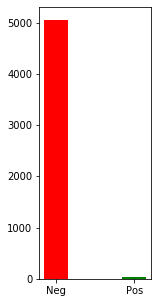

In [5]:
print("min val:", np.min(xtrain))
print("max val:", np.max(xtrain))
print("mean val:", np.mean(xtrain))
print("standard deviation val:", np.std(xtrain))


plt.figure(figsize=(2,5))
plt.bar(['0','1'],[len(neg_sample),len(pos_sample)],width=0.3,color=['r','g'],tick_label=['Neg','Pos'])
plt.show()


## Transforming flux values into matplot images

In [6]:
# Before let's add dummy values into training features to make them perfect square
# No. of features = 3198
# Nearest perfect square 3249
# Therefore 52 new dummy values must be append to training features

# Adding Dummy col
xtrain_temp = np.append(xtrain,np.ones((xtrain.shape[0],52)),axis=1)
xtest_temp = np.append(xtest,np.ones((xtest.shape[0],52)),axis=1)

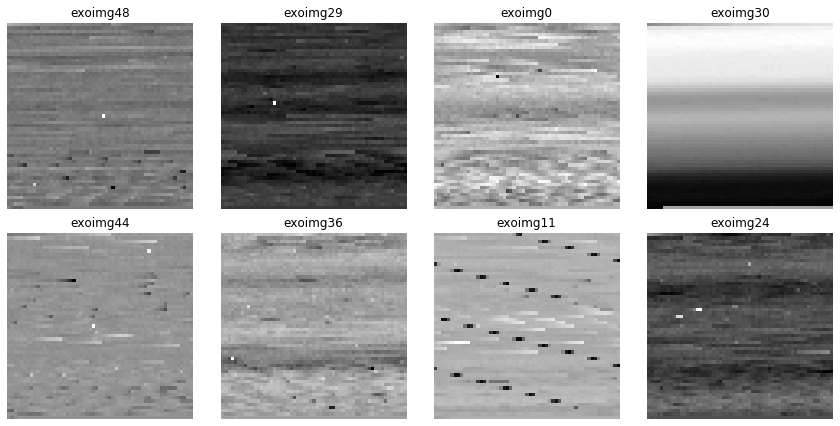

In [8]:

import random as rd
img =  [rd.randint(0,50) for i in range(8)]
fig, axes = plt.subplots(nrows=2,ncols=4,figsize=(12,6))

i = 0
for row in axes:
    for col in row:
        col.set_title(f"exoimg{img[i]}")
        col.imshow(xtrain_temp[img[i]].reshape(57,57),'gray')
        

        col.axis('off')
        i+=1
        
        
fig.tight_layout()

# Data Pre-processing


 * **Noramlizing data**
 * **reducing no. of negative samples and creating postivie sample**
 * **PCA**
 


In [ ]:
# Normalizing data
xtrain = (xtrain - np.min(xtrain,axis=1)[:,None])/(np.max(xtrain,axis=1) - np.min(xtrain,axis=1))[:,None]
xtest = (xtest - np.min(xtest,axis=1)[:,None])/(np.max(xtest,axis=1) - np.min(xtest,axis=1))[:,None]

In [4]:
print("Train: ",xtrain.shape,ytrain.shape)
print("Test: ",xtest.shape,ytest.shape)

Train:  (5087, 3197) (5087, 1)
Test:  (570, 3197) (570, 1)


In [20]:
sum(ytrain == 1)

array([37])

<br>

## Let's have look at data


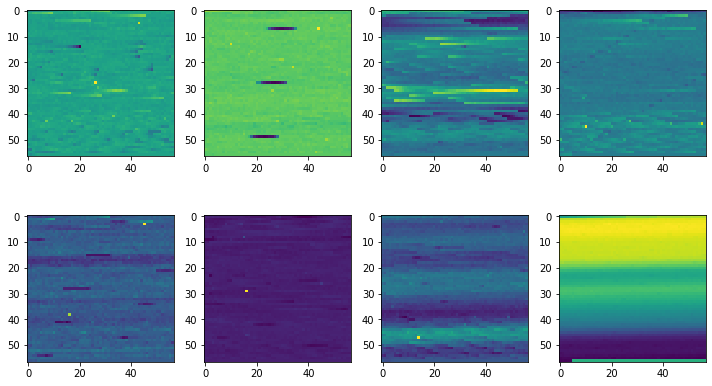

In [8]:
import random as rd
img =  [rd.randint(0,50) for i in range(8)]
fig, axes = plt.subplots(nrows=2,ncols=4,figsize=(10,6))
i = 0
for row in axes:
    for col in row:
        col.imshow(xtrain[img[i]].reshape(57,57))
        i+=1
        
        
fig.tight_layout()

## Why not have a look how these Images sounds?

In [63]:
import wave, struct, math # to calculate the wav file content
import scipy.ndimage  # to resample using nearest neighbour
import time as t
import sounddevice as sd

Playing file: 3 ....
Stop!
Playing file: 39 ....
Stop!
Playing file: 42 ....
Stop!
Playing file: 44 ....
Stop!
Playing file: 8 ....
Stop!
Playing file: 21 ....
Stop!
Playing file: 6 ....
Stop!
Playing file: 45 ....
Stop!


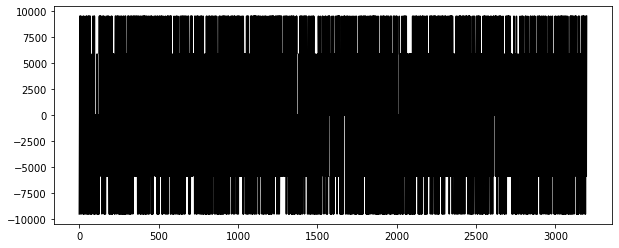

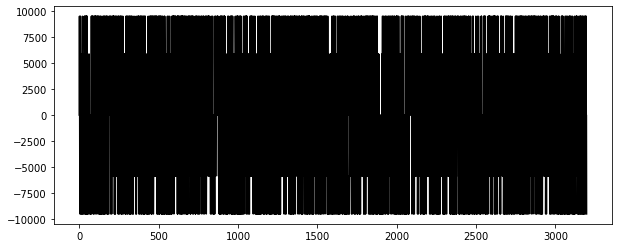

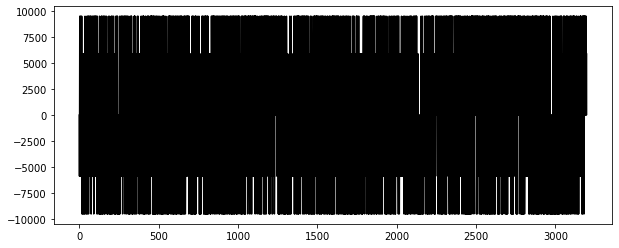

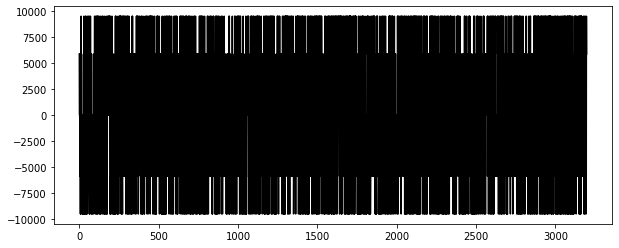

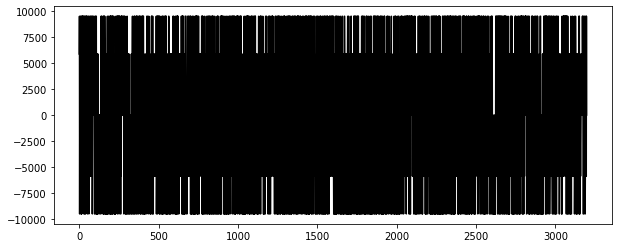

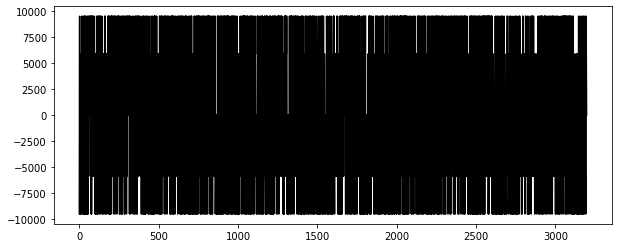

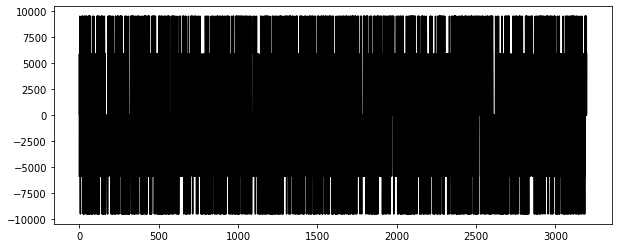

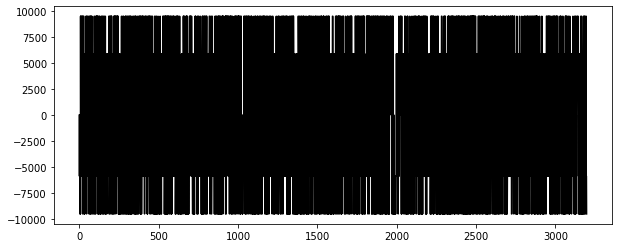

In [70]:
%matplotlib inline
sd.default.samplerate = 3249/3
time = 3.0
frequency = 440
for i in img:
    data = xtrain[i]

    wave = 10000 * np.sin(2*np.pi*frequency*data)
    wave = list(map(int,wave))
    plt.figure(figsize=(10,4))
    plt.plot(wave[0:3249],color='k')
    wav_file = np.array(wave,dtype=np.int16)
    print(f"Playing file: {i} ....")
    sd.play(wav_file,blocking=True)
    print(f"Stop!")
    t.sleep(1)
    

In [1]:
wave = 10000 * np.sin(2*np.pi*frequency*data)
wave = list(map(int,wave))
plt.figure(figsize=(15,12))
plt.plot(wave[0:3249],color='k')
plt.ylim(1000,-1000)

NameError: name 'np' is not defined


## Training Time

In [96]:
import torch.nn as nn
import torch.nn.functional as F
class Classifier(nn.Module):
    activation_hist = []
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(57*57,256)
        self.fc2 = nn.Linear(256,128)
        self.fc3 = nn.Linear(128,64)
        self.fc4 = nn.Linear(64,10)
        self.fc5 = nn.Linear(10,2)
    
    def forward(self,x):
        
        x = x.view(1,3249)
        x = F.relu(self.fc1(x))
        self.activation_hist.extend(list(x.reshape(-1)))
        x = F.relu(self.fc2(x))
        self.activation_hist.extend(list(x.reshape(-1)))
        x = F.relu(self.fc3(x))
        self.activation_hist.extend(list(x.reshape(-1)))
        x = F.relu(self.fc4(x))
        self.activation_hist.extend(list(x.reshape(-1)))
        x = F.log_softmax(self.fc5(x))
        
        return x

In [97]:
Net = Classifier()
print(Net)

Classifier(
  (fc1): Linear(in_features=3249, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
  (fc5): Linear(in_features=10, out_features=2, bias=True)
)


In [98]:
import torch.optim as optim

criterion = nn.NLLLoss()
optimizer = optim.SGD(Net.parameters(),lr=0.001,momentum=0.9)

### Train the network

In [104]:
running_loss = 0.0
music = []
for i, data in enumerate(zip(xtrain,ytrain)):
    x, y = data
    x = torch.tensor(x,dtype=torch.float)
    y = torch.tensor(y,dtype=torch.long)
    
    optimizer.zero_grad()
    
    output = Net(x)
    loss = criterion(output,y)
    loss.backward()
    optimizer.step()
    running_loss = loss.item()
    music.append(Net.activation_hist)
else:
    print(f"trianing loss:{running_loss/len(ytrain)}")


/home/siddharth/.local/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


trianing loss:5.719201675544255e-07


In [100]:
print(len(Net.activation_hist))
sd.default.samplerate = 61048/5
time = 5.0
frequency = 1550

data = (Net.activation_hist)
print(type(data[0]))
wave = 10000 * np.sin(2*np.pi*frequency*data)
wave = list(map(int,wave))
plt.figure(figsize=(15,6))
plt.plot(wave,color='k')
wav_file = np.array(wave,dtype=np.int16)
print(f"Playing file: ....")
sd.play(wav_file,blocking=True)
print(f"Stop!")
t.sleep(1)

2329846
<class 'torch.Tensor'>


TypeError: can't multiply sequence by non-int of type 'float'

In [103]:
print(len(Net.activation_hist))

2329846


In [106]:
print(len((music[0])))

4659692
